# Comparaison des résultats de labellisation selon 3 méthodes: veille humaine, llm, mots-clés

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plotly

# Chargement et nettoyage des données

In [2]:
# Chargement des données
df = pd.read_excel("data/analysis_key_words_veille.xlsx")
print(df.shape)
df.columns

(116, 120)


Index(['Titre',
       'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?',
       'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Commentaire', 'Proposition d'amélioration du tableau', 'source_name',
       'body', 'publication_date',
       ...
       'climat_cause_matched_keywords', 'HRFP_climat_cause_matched_keywords',
       'climat_consequence_matched_keywords',
       'HRFP_climat_consequence_matched_keywords',
       'climat_solution_matched_keywords',
       'HRFP_climat_solution_matched_keywords',
       'ressources_constant_cause_consequence_matched_keywords',
       'HRFP_ressources_constant_cause_consequence_matched_keywords',
       'ressources_

In [3]:
# Verification du nombre d'articles
df.Titre.nunique()

21

In [4]:
# Extraction des données de veille par article
veille = df.iloc[:,0:8]
veille

,Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Commentaire,Proposition d'amélioration du tableau,source_name
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles",NaN,NaN,NaN,L'article évoque un partenariat entre institut...,l'article parle du besoin d'adaptation au chan...,Libération
1,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Biodiversité","causes, solutions",conséquences,NaN,L'article ne mentionne pas un arrêt des pestic...,NaN,Libération
2,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles",solutions,NaN,solutions,NaN,NaN,Libération
3,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",Climat,NaN,NaN,NaN,NaN,NaN,Libération
4,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles",solutions,NaN,solutions,RAS,NaN,Libération
...,...,...,...,...,...,...,...,...
111,"À La Rochelle, on sait recycler les terres rar...","Ressources naturelles, Climat",solutions,NaN,solutions,L'article ne traite pas explicitement de clima...,NaN,Aujourd'hui en France
112,"À La Rochelle, on sait recycler les terres rar...",Ressources naturelles,solutions,NaN,solutions,NaN,NaN,Aujourd'hui en France
113,"À La Rochelle, on sait recycler les terres rar...",Ressources naturelles,NaN,NaN,NaN,L'article se concentre sur les possibilités in...,NaN,Aujourd'hui en France
114,"À La Rochelle, on sait recycler les terres rar...",Ressources naturelles,NaN,NaN,"causes, conséquences, solutions, constats",NaN,NaN,Aujourd'hui en France


In [5]:
# Création de colonnes vrai-faux pour la veille
def set_bool_value(string, label="Climat"):
    val = True if label in string else False
    return val

In [6]:
# Regroupement par article
col_to_aggreg = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?"]

df_veille = (
    veille
    .groupby("Titre")[col_to_aggreg]
    .agg(lambda x: ", ".join(map(str, x.dropna())))
    .reset_index()
)

In [7]:
# Aggrégation des données
df_veille["Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"] = df_veille["Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"].astype("str")
df_veille["Climat_veille"] = df_veille["Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"].apply(lambda s: set_bool_value(s, "Climat"))
df_veille["Biodiv_veille"] = df_veille["Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"].apply(lambda s: set_bool_value(s, "Biodiversité"))
df_veille["Ressources_veille"] = df_veille["Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"].apply(lambda s: set_bool_value(s, "Ressources naturelles"))
df_veille["non-env_veille"] = ~df_veille[["Climat_veille", "Biodiv_veille", "Ressources_veille"]].any(axis=1)
df_veille["crise_env_veille"] = df_veille[["Climat_veille", "Biodiv_veille", "Ressources_veille"]].any(axis=1)

In [8]:
df_veille

,Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Climat_veille,Biodiv_veille,Ressources_veille,non-env_veille,crise_env_veille
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True
1,Auray La goélette Tara fait une escale dédiée ...,"Biodiversité, Biodiversité, Biodiversité, Biod...",solutions,"causes, solutions, solutions, solutions, const...",,False,True,False,False,True
2,Auray Le nouveau complexe de La Forêt a accuei...,"Non, Climat, Climat, Climat, Climat","solutions, solutions, solutions, solutions",,,True,False,False,False,True
3,Carrières 5 moyens de décrocher un job à impact,"Climat, Biodiversité, Ressources naturelles, C...","solutions, constats, solutions",solutions,solutions,True,True,True,False,True
4,CriseiDes signes de reprise,"Climat, Biodiversité, Ressources naturelles, C...","constats, conséquences, solutions, causes, sol...",solutions,solutions,True,True,True,False,True
5,De bonnes nouvelles,"Biodiversité, Biodiversité, Biodiversité, Biod...",,"causes, solutions, causes, constats, solutions...",,False,True,False,False,True
6,Groenland : l'incroyable eldorado des glaces,"Biodiversité, Ressources naturelles, Ressource...","conséquences, constats, causes","conséquences, constats, causes, conséquences, ...","conséquences, causes, conséquences, constats, ...",True,True,True,False,True
7,"La chute des cours des hydrocarbures, un frein...","Ressources naturelles, Climat, Climat, Climat,...","causes, solutions, causes, solutions, solutions",,"constats, solutions",True,False,True,False,True
8,"Le SDE 24, en soutien de la Mauritanie","Ressources naturelles, Ressources naturelles, ...",,,"solutions, constats, solutions, causes, conséq...",False,False,True,False,True
9,Le loto de la biodiversité met l’accent sur le...,"Biodiversité, Biodiversité, Biodiversité, Biod...",causes,"constats, solutions, solutions, solutions","causes, constats",False,True,False,False,True


In [9]:
# Simplification de df
df = df.drop(columns=col_to_aggreg+["Commentaire","Proposition d'amélioration du tableau"])

In [10]:
# Fusion de la veille avec les résultats de llm et mots clés
data = df_veille.merge(df, on="Titre")
print(data.shape)
data.head()

(116, 123)


,Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?","Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Climat_veille,Biodiv_veille,Ressources_veille,non-env_veille,crise_env_veille,...,climat_cause_matched_keywords,HRFP_climat_cause_matched_keywords,climat_consequence_matched_keywords,HRFP_climat_consequence_matched_keywords,climat_solution_matched_keywords,HRFP_climat_solution_matched_keywords,ressources_constant_cause_consequence_matched_keywords,HRFP_ressources_constant_cause_consequence_matched_keywords,ressources_solution_matched_keywords,HRFP_ressources_solution_matched_keywords
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True,...,NaN,"agriculteur, gaz, agricole, agricole, agricult...","aléas climatiques,",NaN,"réduire les émissions de gaz à effet de serre,...","alternative, développement durable,","santé des sols, santé des sols, santé des sols,","sol, sol, sol, alternative, sol, sol, sol","agriculture durable,",NaN
1,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True,...,NaN,"agriculteur, gaz, agricole, agricole, agricult...","aléas climatiques,",NaN,"réduire les émissions de gaz à effet de serre,...","alternative, développement durable,","santé des sols, santé des sols, santé des sols,","sol, sol, sol, alternative, sol, sol, sol","agriculture durable,",NaN
2,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True,...,NaN,"agriculteur, gaz, agricole, agricole, agricult...","aléas climatiques,",NaN,"réduire les émissions de gaz à effet de serre,...","alternative, développement durable,","santé des sols, santé des sols, santé des sols,","sol, sol, sol, alternative, sol, sol, sol","agriculture durable,",NaN
3,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True,...,NaN,"agriculteur, gaz, agricole, agricole, agricult...","aléas climatiques,",NaN,"réduire les émissions de gaz à effet de serre,...","alternative, développement durable,","santé des sols, santé des sols, santé des sols,","sol, sol, sol, alternative, sol, sol, sol","agriculture durable,",NaN
4,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...","Climat, Ressources naturelles, Climat, Biodive...","causes, solutions, solutions, solutions",conséquences,"solutions, solutions",True,True,True,False,True,...,NaN,"agriculteur, gaz, agricole, agricole, agricult...","aléas climatiques,",NaN,"réduire les émissions de gaz à effet de serre,...","alternative, développement durable,","santé des sols, santé des sols, santé des sols,","sol, sol, sol, alternative, sol, sol, sol","agriculture durable,",NaN


In [11]:
# Retrait des lignes dupliquées
data = data.drop_duplicates()
print(data.shape)

(21, 123)


In [12]:
# Sauvegarde du fichier
data.to_excel("data/analysis_veille_llm_keywords.xlsx", index=False)

# Analyse du modèle de labellisation environnement/non-environnement

In [13]:
data.shape

(21, 123)

## Vérification de l'intégrité des données

In [14]:
def check_integrity(df, col_list, col_to_check):
    has_env = df[col_list].any(axis=1)   # Booléen "y a-t-il un thème environnemental ?"
    check = (df[col_to_check] == ~has_env)
    if check.all():
        print("✅ La condition est toujours respectée.")
    else:
        print("❌ Incohérences détectées :")
        print(df.loc[~check])

In [16]:
# VEILLE : Verification de la logique entre les crise et la labellisation entre environnement et non environnement
check_integrity(data, ["Climat_veille", "Biodiv_veille", "Ressources_veille"], "non-env_veille")

✅ La condition est toujours respectée.


In [17]:
# LLM : Verification de la logique entre les crise et la labellisation entre environnement et non environnement
check_integrity(data, ["LLM_biodiversite", "LLM_climat", "LLM_ressources"], "LLM_PAS DE CRISE")

✅ La condition est toujours respectée.


In [18]:
# Mots clés : Verification de la logique entre les crise et la labellisation entre environnement et non environnement
check_integrity(data, [
    "Biodiversité_predicted_absolute_count", "Climat_predicted_absolute_count", "Ressources_predicted_absolute_count"],
    "Pas_de_crise_predicted_maille_categorie")


✅ La condition est toujours respectée.


## Corrélation entre les 3 méthodes pour la labellisation environnement/non environnement

In [21]:
# Conversion de l'output de Bert en booleen
data["BERT_env_pred"] = data["BERT_env_pred"].astype("bool")

In [22]:
# Définition des colonnes
col_for_env = [
    "crise_env_veille", 
    "BERT_env_pred",
    "LLM_CRISE",
    "Crise_predicted_maille_categorie"]

# Création du dataset
env_data = data[col_for_env]

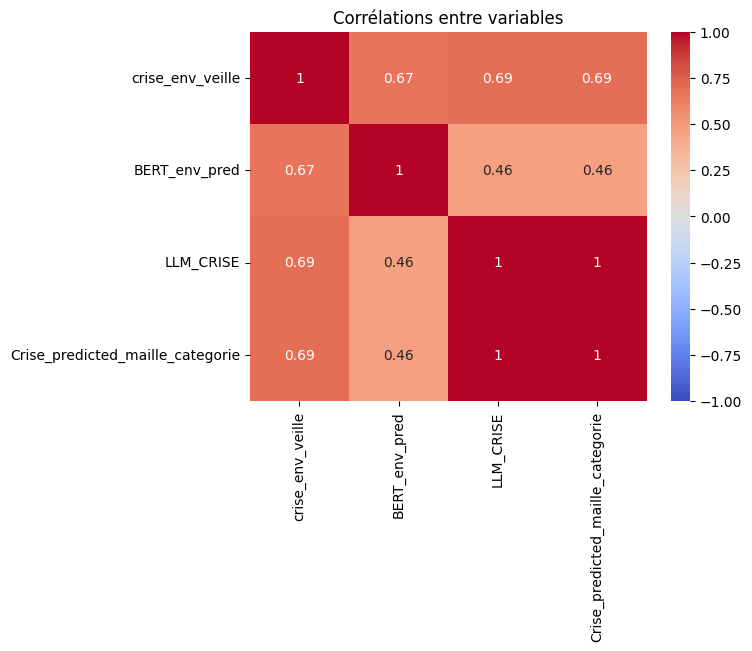

In [34]:
# --- 1. Matrice de corrélation ---
corr = env_data.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélations entre variables")
plt.show()

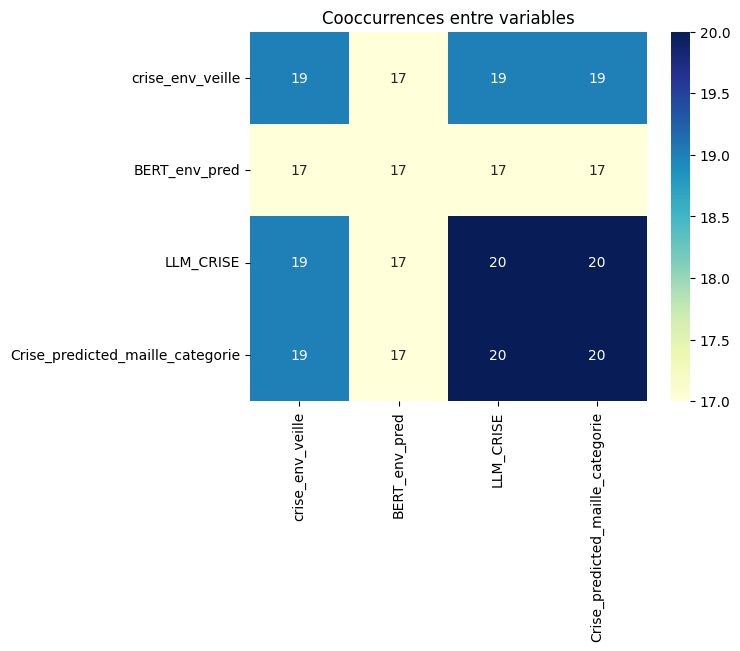

In [36]:
# --- 2. Matrice de cooccurrence ---
env_data_int = env_data.astype(int)
cooc = env_data_int.T @ env_data_int   # produit matriciel

sns.heatmap(cooc, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cooccurrences entre variables")
plt.show()

=> L'algorithme BERT est plus d'accord avec la labellisation humaine que la labellisation par LLM ou mot clés. 

**Détails des discordances**


In [35]:
# Articles discordants
data.query("BERT_env_pred == False")[["Titre", "nom_fichier"] + col_for_env]

,Titre,nom_fichier,crise_env_veille,BERT_env_pred,LLM_CRISE,Crise_predicted_maille_categorie
33,Groenland : l'incroyable eldorado des glaces,LePoint_1744884280000_3602,True,False,True,True
62,"Michelin : Chiffre d’affaires en baisse de 1,9...",Globenewswire_1745509530000_662,False,False,True,True
91,Pourquoi le Groenland est l'objet des plus gra...,LePointfr_1744820405000_2360,True,False,True,True
101,Quelles sont les solutions pour défiscaliser e...,LePointfr_1744862703000_613,False,False,False,False


=> Je serais plutôt d'accord avec le LLM et les mots-clés dans ce cas là

# Labellisation crise climatique

In [49]:
# Définition des colonnes
col_for_climat = [
    "Climat_veille", 
    "LLM_climat",
    "Climat_predicted_absolute_count"]

# Création du dataset
climat_data = data[col_for_climat]

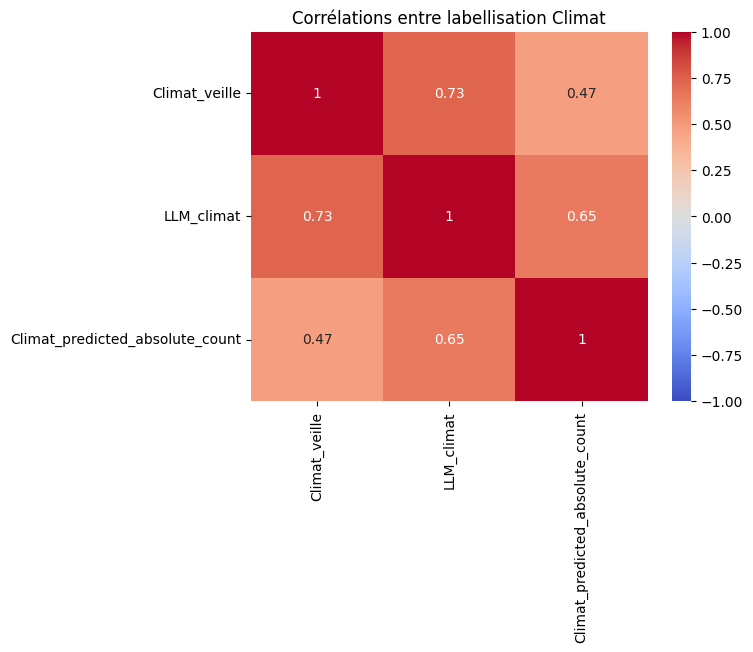

In [50]:
# --- 1. Matrice de corrélation ---
corr_climat = climat_data.corr(method="pearson")
sns.heatmap(corr_climat, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélations entre labellisation Climat")
plt.show()

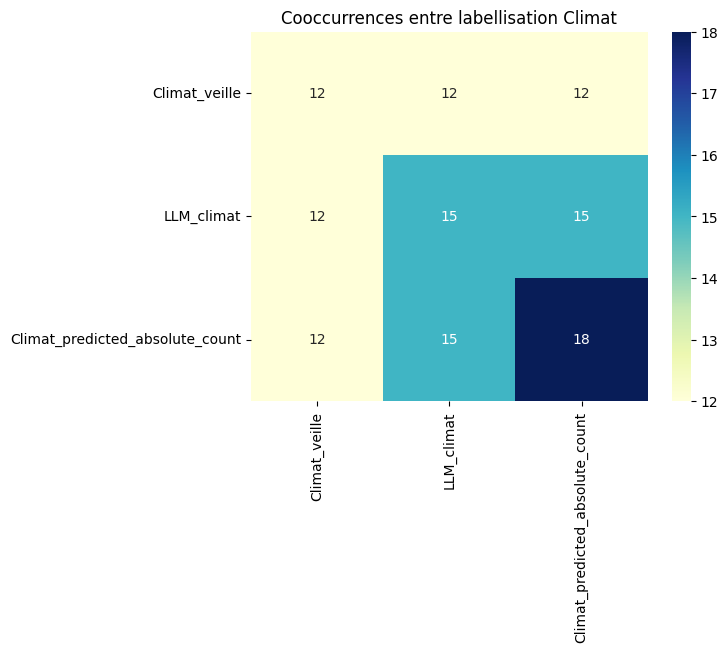

In [51]:
# --- 2. Matrice de cooccurrence ---
climat_data_int = climat_data.astype(int)
cooc_climat = climat_data_int.T @ climat_data_int   # produit matriciel

sns.heatmap(cooc_climat, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cooccurrences entre labellisation Climat")
plt.show()

In [52]:
# Articles discordants
data.query("Climat_veille == False")[["Titre", "nom_fichier"] + col_for_climat]

,Titre,nom_fichier,Climat_veille,LLM_climat,Climat_predicted_absolute_count
5,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896,False,False,True
25,De bonnes nouvelles,LaMontagne_1745532298000_5906,False,True,True
47,"Le SDE 24, en soutien de la Mauritanie",SudOuest_1745469056000_5319,False,False,False
52,Le loto de la biodiversité met l’accent sur le...,LeHuffPost_1745524807000_693,False,False,True
57,"Les secrets bien gardés de Montecristo, « l'îl...",LePointfr_1745384703000_4434,False,False,False
62,"Michelin : Chiffre d’affaires en baisse de 1,9...",Globenewswire_1745509530000_662,False,True,True
91,Pourquoi le Groenland est l'objet des plus gra...,LePointfr_1744820405000_2360,False,True,True
101,Quelles sont les solutions pour défiscaliser e...,LePointfr_1744862703000_613,False,False,False
106,"« Il y a 50 ans, on nous prenait pour des rigo...",LeParisien_1745285501000_2191,False,False,True


## Labellisation Biodiversité

In [53]:
# Définition des colonnes
col_for_biodiv = [
    "Biodiv_veille", 
    "LLM_biodiversite",
    "Biodiversité_predicted_absolute_count"]

# Création du dataset
biodiv_data = data[col_for_biodiv]

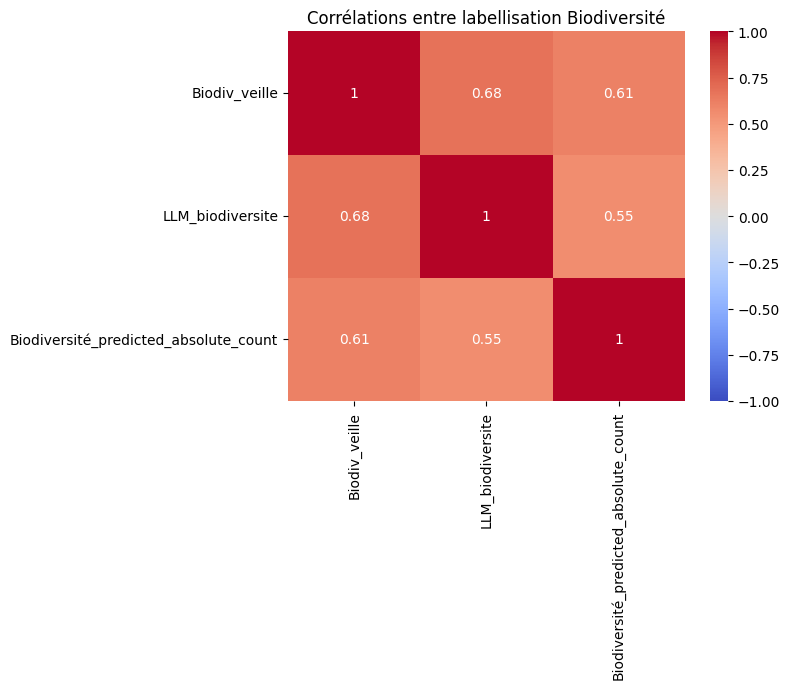

In [54]:
# --- 1. Matrice de corrélation ---
corr_biodiv = biodiv_data.corr(method="pearson")
sns.heatmap(corr_biodiv, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélations entre labellisation Biodiversité")
plt.show()

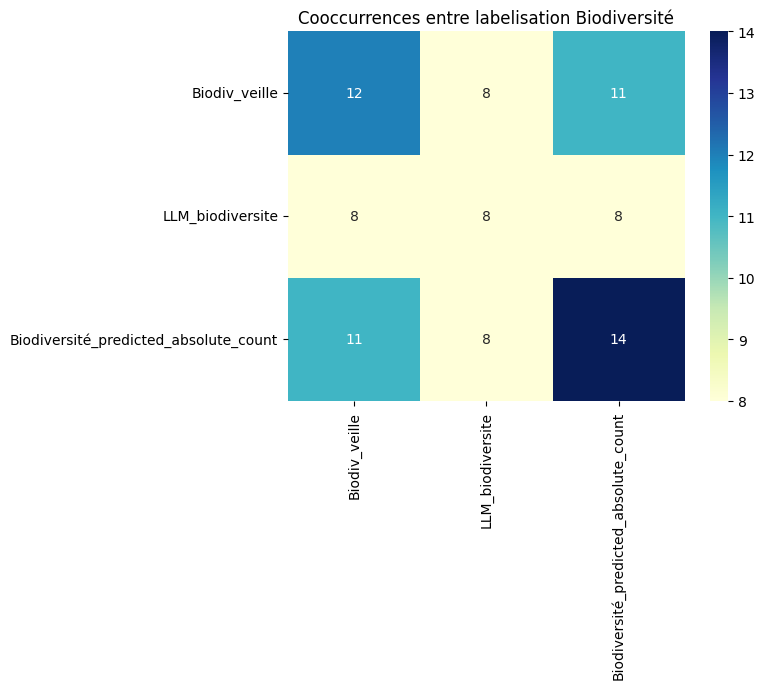

In [55]:
# --- 2. Matrice de cooccurrence ---
biodiv_data_int = biodiv_data.astype(int)
cooc_biodiv = biodiv_data_int.T @ biodiv_data_int   # produit matriciel

sns.heatmap(cooc_biodiv, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cooccurrences entre labelisation Biodiversité")
plt.show()

In [58]:
# Articles discordants
data.query("LLM_biodiversite == False")[["Titre", "nom_fichier"] + col_for_biodiv]

,Titre,nom_fichier,Biodiv_veille,LLM_biodiversite,Biodiversité_predicted_absolute_count
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",Libération_1745578060000_155,True,False,True
10,Auray Le nouveau complexe de La Forêt a accuei...,LeTélégramme_1745473991000_5442,False,False,False
20,CriseiDes signes de reprise,LeParisien_1745285501000_2190,True,False,False
42,"La chute des cours des hydrocarbures, un frein...",LeFigaro_1744772485000_1907,False,False,False
47,"Le SDE 24, en soutien de la Mauritanie",SudOuest_1745469056000_5319,False,False,False
62,"Michelin : Chiffre d’affaires en baisse de 1,9...",Globenewswire_1745509530000_662,False,False,True
67,Mohamed Fikrat : Le secteur financier appelé à...,Libération_1745578061000_156,True,False,True
76,"Oliver Geden, le scientifique converti au stoc...",LHumanité_1745348674000_1706,False,False,False
81,Planisware obtient la note B du CDP récompensa...,Globenewswire_1745337604000_283,False,False,False
86,Pourquoi la France doit viser le mix énergétique,LeTélégramme_1745387656000_394,False,False,True


## Labelisation Ressources

In [60]:
# Définition des colonnes
col_for_ressources = [
    "Ressources_veille", 
    "LLM_ressources",
    "Ressources_predicted_absolute_count"]

# Création du dataset
ressources_data = data[col_for_ressources]

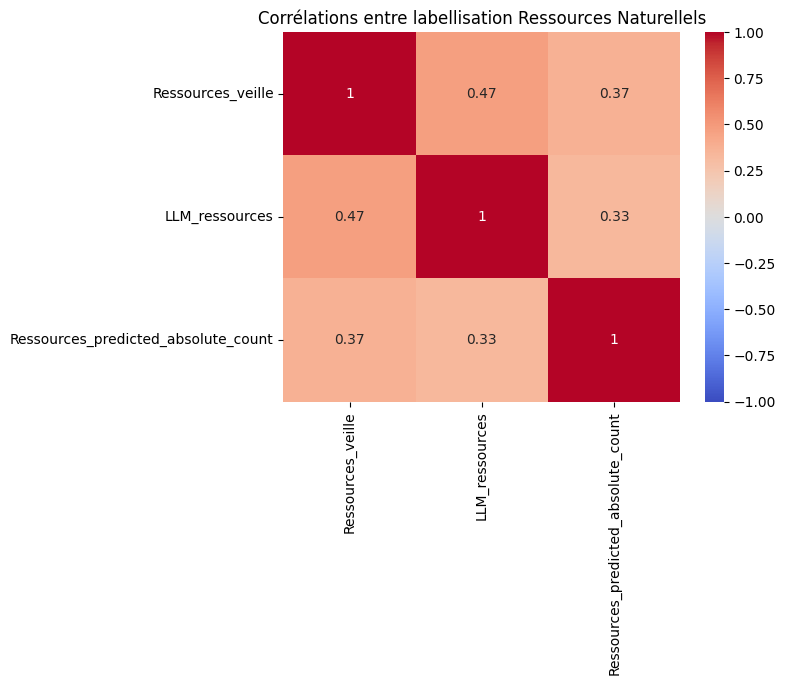

In [61]:
# --- 1. Matrice de corrélation ---
corr_ressources = ressources_data.corr(method="pearson")
sns.heatmap(corr_ressources, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélations entre labellisation Ressources Naturellels")
plt.show()

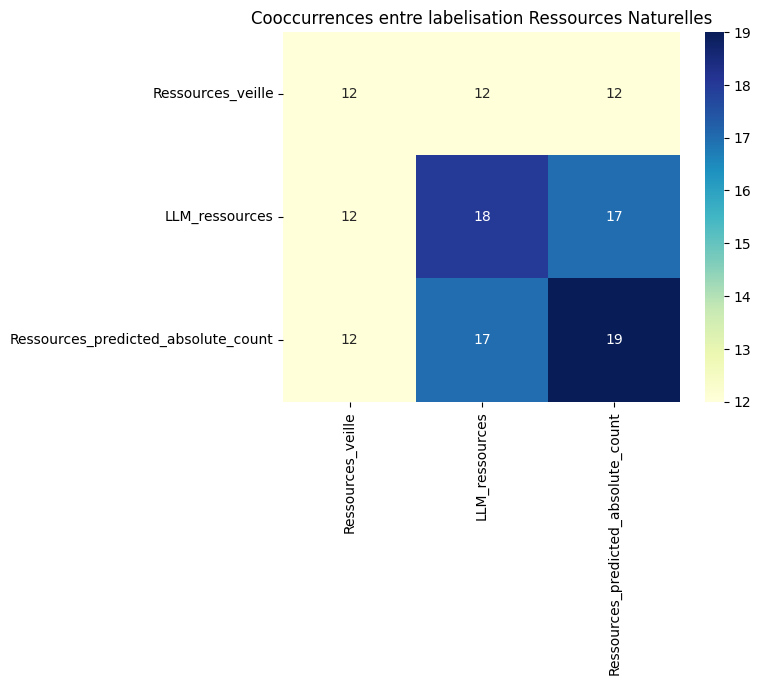

In [62]:
# --- 2. Matrice de cooccurrence ---
ressources_data_int = ressources_data.astype(int)
cooc_ressources = ressources_data_int.T @ ressources_data_int   # produit matriciel

sns.heatmap(cooc_ressources, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cooccurrences entre labelisation Ressources Naturelles")
plt.show()

In [64]:
# Articles discordants
data.query("Ressources_veille == False")[["Titre", "nom_fichier"] + col_for_ressources]

,Titre,nom_fichier,Ressources_veille,LLM_ressources,Ressources_predicted_absolute_count
5,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896,False,True,True
10,Auray Le nouveau complexe de La Forêt a accuei...,LeTélégramme_1745473991000_5442,False,True,True
25,De bonnes nouvelles,LaMontagne_1745532298000_5906,False,True,True
52,Le loto de la biodiversité met l’accent sur le...,LeHuffPost_1745524807000_693,False,False,True
57,"Les secrets bien gardés de Montecristo, « l'îl...",LePointfr_1745384703000_4434,False,True,True
62,"Michelin : Chiffre d’affaires en baisse de 1,9...",Globenewswire_1745509530000_662,False,True,True
76,"Oliver Geden, le scientifique converti au stoc...",LHumanité_1745348674000_1706,False,False,True
96,Quelles conséquences de l’érosion du littoral ...,SudOuest_1745208282000_1215,False,True,False
101,Quelles sont les solutions pour défiscaliser e...,LePointfr_1744862703000_613,False,False,False
